In [1]:
import numpy as np
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from PIL import Image
import os
import matplotlib.pyplot as plt
import random
import joblib

chargement du dataset

In [ ]:
# Chargement des images à partir des répertoires 'train' et 'test'
train_dir = '../data/images/train'
test_dir = '../data/images/test'

In [3]:
# Chargement des données
benign_train = []
malignant_train = []
benign_test = []
malignant_test = []

for file in os.listdir(train_dir + '/benign'):
    img = Image.open(train_dir + '/benign/' + file)
    img = img.resize((50, 50))
    img = np.array(img)
    img = img.flatten()
    benign_train.append(img)

for file in os.listdir(train_dir + '/malignant'):
    img = Image.open(train_dir + '/malignant/' + file)
    img = img.resize((50, 50))
    img = np.array(img)
    img = img.flatten()
    malignant_train.append(img)

for file in os.listdir(test_dir + '/benign'):
    img = Image.open(test_dir + '/benign/' + file)
    img = img.resize((50, 50))
    img = np.array(img)
    img = img.flatten()
    benign_test.append(img)

for file in os.listdir(test_dir + '/malignant'):
    img = Image.open(test_dir + '/malignant/' + file)
    img = img.resize((50, 50))
    img = np.array(img)
    img = img.flatten()
    malignant_test.append(img)

# Conversion des listes en tableaux numpy
benign_train = np.array(benign_train)
malignant_train = np.array(malignant_train)
benign_test = np.array(benign_test)
malignant_test = np.array(malignant_test)

# Création des labels
benign_train_labels = np.zeros(benign_train.shape[0])
malignant_train_labels = np.ones(malignant_train.shape[0])
benign_test_labels = np.zeros(benign_test.shape[0])
malignant_test_labels = np.ones(malignant_test.shape[0])

# Concaténation des données
X_train = np.concatenate((benign_train, malignant_train), axis=0)
y_train = np.concatenate((benign_train_labels, malignant_train_labels), axis=0)
X_test = np.concatenate((benign_test, malignant_test), axis=0)
y_test = np.concatenate((benign_test_labels, malignant_test_labels), axis=0)


Affichage de quelques images avec Pillow

In [4]:
# Create an MLP classifier
mlp = MLPClassifier(hidden_layer_sizes=(256, 128, 64), max_iter=100, alpha=1e-4,
                    solver='sgd', verbose=10, random_state=1,
                    learning_rate_init=.00001)


In [5]:
# Train the model
mlp.fit(X_train, y_train)

Iteration 1, loss = 15.36293812
Iteration 2, loss = 11.09118428
Iteration 3, loss = 6.89838033
Iteration 4, loss = 3.88347899
Iteration 5, loss = 1.67753489
Iteration 6, loss = 1.43498788
Iteration 7, loss = 1.18632132
Iteration 8, loss = 0.76991514
Iteration 9, loss = 1.01364263
Iteration 10, loss = 0.80420691
Iteration 11, loss = 0.72500959
Iteration 12, loss = 0.54323982
Iteration 13, loss = 0.74721649
Iteration 14, loss = 0.65299243
Iteration 15, loss = 0.63601089
Iteration 16, loss = 0.50583975
Iteration 17, loss = 0.50473419
Iteration 18, loss = 0.51852463
Iteration 19, loss = 0.42671745
Iteration 20, loss = 0.48890827
Iteration 21, loss = 0.47136296
Iteration 22, loss = 0.41772137
Iteration 23, loss = 0.44751592
Iteration 24, loss = 0.44444948
Iteration 25, loss = 0.53748461
Iteration 26, loss = 0.52093889
Iteration 27, loss = 0.52701685
Iteration 28, loss = 0.40558611
Iteration 29, loss = 0.42727289
Iteration 30, loss = 0.47406859
Iteration 31, loss = 0.41129965
Iteration 32, l

c:\Users\Swerk\PycharmProjects\pythonProject1\.venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(hidden_layer_sizes=(256, 128, 64), learning_rate_init=1e-05,
              max_iter=100, random_state=1, solver='sgd', verbose=10)

In [6]:
y_pred = mlp.predict(X_test)

In [ ]:
# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: ", accuracy)

# Sauvegarder le model en format sklearn_skincancer.pkl
joblib.dump(mlp, '../saved_models/sklearn_skincancer.pkl')

Accuracy:  0.7863636363636364


['../saved_models/sklearn_skincancer.pkl']

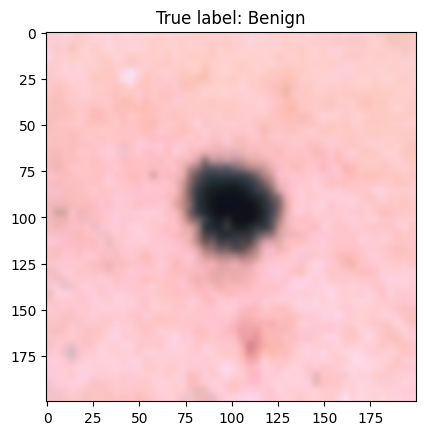

The image is benign


In [8]:
# Choisir une image aléatoire, afficher l'image et prédire si elle est maligne ou bénigne
index = random.randint(0, len(X_test) - 1)

img = X_test[index].reshape(50, 50, 3)
img_resized = np.array(Image.fromarray(img).resize((200, 200)))  # Resize the image to 200x200

plt.imshow(img_resized)
plt.title(f"True label: {'Malignant' if y_test[index] == 1 else 'Benign'}")
plt.show()

prediction = mlp.predict([X_test[index]])
if prediction == 0:
    print("The image is benign")
else:
    print("The image is malignant")